## Подключаю импорты и расписываем целевую и градиентный спуск

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Целевая функция

In [58]:
def f(x):
    x1, x2 = x
    return 64*x1**2 + 126*x1*x2 + 64*x2**2 - 10*x1 + 30*x2 + 13

### Градиент функции

In [59]:
def grad_f(x):
    x1, x2 = x
    df_dx1 = 128*x1 + 126*x2 - 10
    df_dx2 = 126*x1 + 128*x2 + 30
    return np.array([df_dx1, df_dx2])

## Построил график функции

 Диапазон для визуализации (подбираем так, чтобы видеть минимум ~ (10, -10))

In [60]:
x1_vals = np.linspace(-5, 15, 150)
x2_vals = np.linspace(-20, 5, 150)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

3D-график

Text(0.5, 0, '$f(x_1, x_2)$')

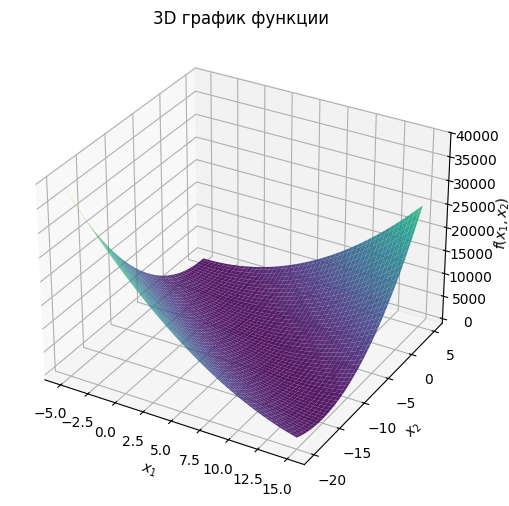

In [61]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.9)
ax1.set_title('3D график функции')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1, x_2)$')

Аналитический минимум

In [62]:
x1_star = 5060 / 508          # ≈ 9.9606
x2_star = (10 - 128 * x1_star) / 126  # ≈ -10.0394
print(f"Аналитический минимум: x1 = {x1_star:.6f}, x2 = {x2_star:.6f}")
print(f"f(x1*, x2*) = {f([x1_star, x2_star]):.6f}")

Аналитический минимум: x1 = 9.960630, x2 = -10.039370
f(x1*, x2*) = -187.393701


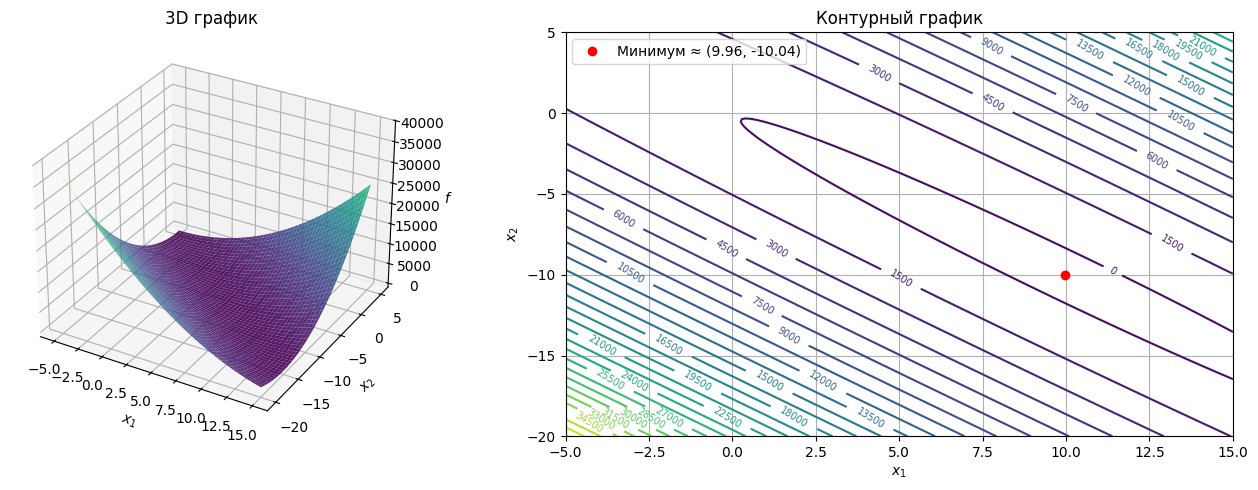

In [63]:
# Диапазон вокруг минимума
x1_vals = np.linspace(-5, 15, 150)
x2_vals = np.linspace(-20, 5, 150)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

fig = plt.figure(figsize=(14, 5))

# 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.9)
ax1.set_title('3D график')
ax1.set_xlabel('$x_1$'); ax1.set_ylabel('$x_2$'); ax1.set_zlabel('$f$')

# Контур
ax2 = fig.add_subplot(122)
contours = ax2.contour(X1, X2, Z, levels=30, cmap='viridis')
ax2.clabel(contours, inline=True, fontsize=7)
ax2.plot(x1_star, x2_star, 'ro', label=f'Минимум ≈ ({x1_star:.2f}, {x2_star:.2f})')
ax2.set_title('Контурный график')
ax2.set_xlabel('$x_1$'); ax2.set_ylabel('$x_2$')
ax2.legend(); ax2.grid(True)

plt.tight_layout()
plt.show()

# Градиентный спуск с постоянным шагом

In [64]:
def gradient_descent_constant(f, grad_f, x0, alpha=0.001, tol=1e-8, max_iter=5000):
    x = np.array(x0, dtype=float)
    traj = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - alpha * grad
        traj.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:
            print(f"✅ Градиентный спуск сошёлся за {i+1} итераций")
            break
        x = x_new
    else:
        print("⚠️ Не сошлось")
    return x, np.array(traj)

# Запуск
x0 = [0.0, 0.0]
min1, traj1 = gradient_descent_constant(f, grad_f, x0, alpha=0.001)

print("Найденный минимум (постоянный шаг):", min1)
print("f(min) =", f(min1))

⚠️ Не сошлось
Найденный минимум (постоянный шаг): [  9.96018045 -10.0389206 ]
f(min) = -187.39370038334533


Начальную точку выбирал не слишком близко к минимуму

In [65]:
x0 = [0.0, 0.0]

Подбор шага: из-за больших коэффициентов (128)


In [66]:
min1, traj1 = gradient_descent_constant(f, grad_f, x0, alpha=0.001)

print("Найденный минимум (постоянный шаг):", min1)
print("f(min) =", f(min1))
print("Аналитический минимум:", [x1_star, x2_star])

⚠️ Не сошлось
Найденный минимум (постоянный шаг): [  9.96018045 -10.0389206 ]
f(min) = -187.39370038334533
Аналитический минимум: [9.960629921259843, -10.039370078740157]


# Наискорейший градиентный спуск

In [67]:
def steepest_descent(f, grad_f, x0, tol=1e-10, max_iter=1000):
    x = np.array(x0, dtype=float)
    traj = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            print(f"✅ Сошлось по градиенту за {i} итераций")
            break
        def phi(alpha):
            return f(x - alpha * grad)
        res = minimize_scalar(phi, bounds=(0, 0.02), method='bounded')
        x = x - res.x * grad
        traj.append(x.copy())
        if len(traj) > 1 and np.linalg.norm(traj[-1] - traj[-2]) < tol:
            print(f"✅ Сошлось по x за {i+1} итераций")
            break
    else:
        print("⚠️ Не сошлось")
    return x, np.array(traj)

# Запуск
min2, traj2 = steepest_descent(f, grad_f, x0)

print("Найденный минимум (наискорейший):", min2)
print("f(min) =", f(min2))

⚠️ Не сошлось
Найденный минимум (наискорейший): [  9.96062991 -10.03937008]
f(min) = -187.393700787403


# Визуализация траекторий


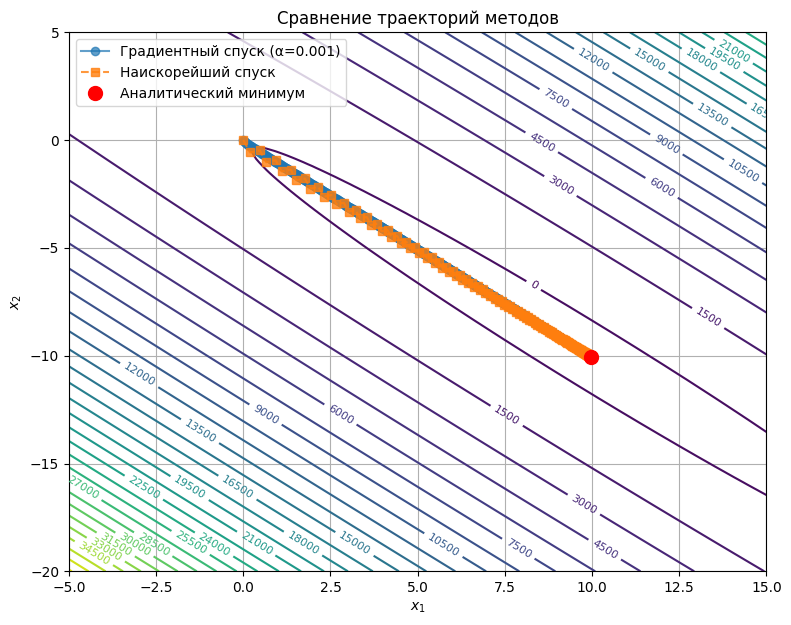

In [68]:
plt.figure(figsize=(9, 7))
contour = plt.contour(X1, X2, Z, levels=30, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

plt.plot(traj1[:, 0], traj1[:, 1], 'o-', label='Градиентный спуск (α=0.001)', alpha=0.7)
plt.plot(traj2[:, 0], traj2[:, 1], 's--', label='Наискорейший спуск', alpha=0.8)
plt.plot(x1_star, x2_star, 'ro', markersize=10, label='Аналитический минимум')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Сравнение траекторий методов')
plt.legend()
plt.grid(True)
plt.show()